In [11]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=8) as executor:
    from ta import add_all_ta_features
    import numpy as np
    import requests
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from datetime import datetime
    import warnings
    import yfinance as yf
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Reshape
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LambdaCallback
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error, max_error, mean_absolute_percentage_error
    from tensorflow.keras.losses import Huber
    from scipy.stats import spearmanr, kendalltau, pearsonr, linregress
    from tensorflow.keras.models import Sequential, load_model
    from keras.constraints import max_norm
    from keras.layers import Attention
    from keras.layers import MultiHeadAttention, Input
    from tensorflow.keras.layers import LayerNormalization, Permute, Reshape
    from keras.models import Sequential
    from keras.layers import Dense
    from keras_self_attention import SeqSelfAttention
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def get_last_10000_days(symbol):
    # Fetch historical df for the last 10000 days of daily data
    df = yf.download(symbol, period='10000d', interval='1d')
    return df
def main():
    with ThreadPoolExecutor(max_workers=8) as executor:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            symbol = "SBUX"
            df = get_last_10000_days(symbol)
            #In case you want to use different features than the close to train the model, here is over 100 different indicators.
            df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
            #We select the last 7500 data points to reduce volatility in the initial points of the dataset and increase stationarity, but also for sequence shaping reasons
            df = df.drop(df.index[:-7500])
            return df
#Call the main function to receieve the data
if __name__ == "__main__":
    df = main().dropna(axis=0)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
1994-06-29,0.820313,0.820313,0.773438,0.789063,0.616995,20364800,8.851668e+08,1096345600,-0.037993,-2.315748e+05,...,-2.152070,-0.281587,-1.870482,4.781148,-6.437336,11.218484,0.836055,-3.349196,-3.406566,134.883509
1994-06-30,0.812500,0.812500,0.773438,0.789063,0.616995,16771200,8.818127e+08,1113116800,-0.224485,-1.984927e+05,...,-2.650594,-0.755389,-1.895205,5.991180,-3.951633,9.942813,0.818860,0.000000,0.000000,134.883509
1994-07-01,0.789063,0.789063,0.765625,0.781250,0.610886,6080000,8.838392e+08,1107036800,-0.337534,-1.769228e+05,...,-3.093457,-1.223002,-1.870454,0.691050,-3.023096,3.714146,0.804960,-0.990159,-0.995094,132.557789
1994-07-05,0.781250,0.789063,0.765625,0.781250,0.610886,10912000,8.874762e+08,1117948800,-0.256816,-1.516481e+05,...,-3.413564,-1.661114,-1.752449,-0.719582,-2.562393,1.842811,0.796667,0.000000,0.000000,132.557789
1994-07-06,0.781250,0.804688,0.765625,0.800781,0.626158,11923200,8.970144e+08,1129872000,-0.144495,-9.671661e+04,...,-3.443738,-2.017639,-1.426099,-1.203025,-2.290520,1.087495,0.797413,2.499969,2.469231,138.371663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,86.970001,87.360001,86.360001,87.190002,87.190002,6322900,5.190658e+09,3699151400,-0.266102,-3.301135e+06,...,-1.461532,-1.039983,-0.421549,-5.394020,-5.751924,0.357904,89.794009,0.391484,0.390720,25854.194142
2024-04-09,87.190002,87.599998,86.309998,87.129997,87.129997,6242700,5.192352e+09,3692908700,-0.255819,-2.883058e+06,...,-1.550783,-1.142143,-0.408640,-5.842170,-5.769973,-0.072197,89.411523,-0.068821,-0.068845,25836.332160
2024-04-10,86.320000,86.870003,85.599998,85.949997,85.949997,7413900,5.189025e+09,3685494800,-0.318945,-3.720965e+06,...,-1.710096,-1.255734,-0.454362,-4.788363,-5.573651,0.785288,88.824982,-1.354299,-1.363553,25485.076785


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 seq_self_attention_3 (SeqS  (None, 1, 3)              257       
 elfAttention)                                                   
                                                                 
 reshape_3 (Reshape)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300


C:\Users\daddy\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


141/141 - 1s - loss: 4.7974 - lr: 0.0010 - 630ms/epoch - 4ms/step
Epoch 2/300
141/141 - 0s - loss: 3.3451 - lr: 0.0010 - 111ms/epoch - 788us/step
Epoch 3/300
141/141 - 0s - loss: 2.1322 - lr: 0.0010 - 86ms/epoch - 608us/step
Epoch 4/300
141/141 - 0s - loss: 1.2210 - lr: 0.0010 - 113ms/epoch - 800us/step
Epoch 5/300
141/141 - 0s - loss: 0.5709 - lr: 0.0010 - 86ms/epoch - 612us/step
Epoch 6/300
141/141 - 0s - loss: 0.1729 - lr: 0.0010 - 111ms/epoch - 789us/step
Epoch 7/300
141/141 - 0s - loss: 0.0175 - lr: 0.0010 - 97ms/epoch - 690us/step
Epoch 8/300
141/141 - 0s - loss: 0.0035 - lr: 0.0010 - 88ms/epoch - 626us/step
Epoch 9/300
141/141 - 0s - loss: 0.0034 - lr: 0.0010 - 120ms/epoch - 848us/step
Epoch 10/300
141/141 - 0s - loss: 0.0035 - lr: 0.0010 - 99ms/epoch - 701us/step
Epoch 11/300
141/141 - 0s - loss: 0.0034 - lr: 0.0010 - 120ms/epoch - 850us/step
Epoch 12/300
141/141 - 0s - loss: 0.0035 - lr: 0.0010 - 97ms/epoch - 686us/step
Epoch 13/300
141/141 - 0s - loss: 0.0035 - lr: 0.0010 - 9

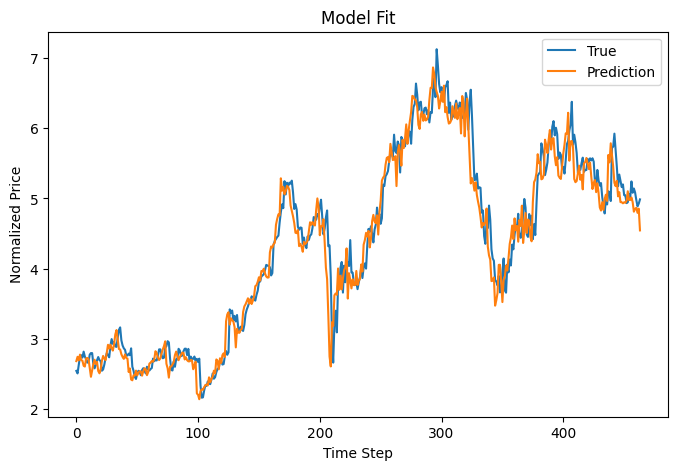

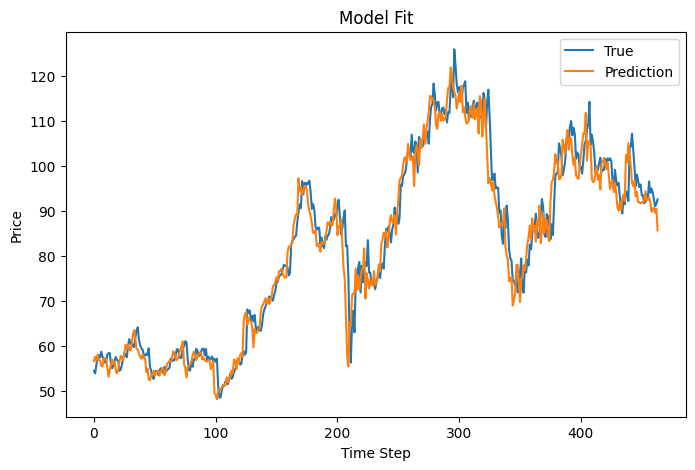

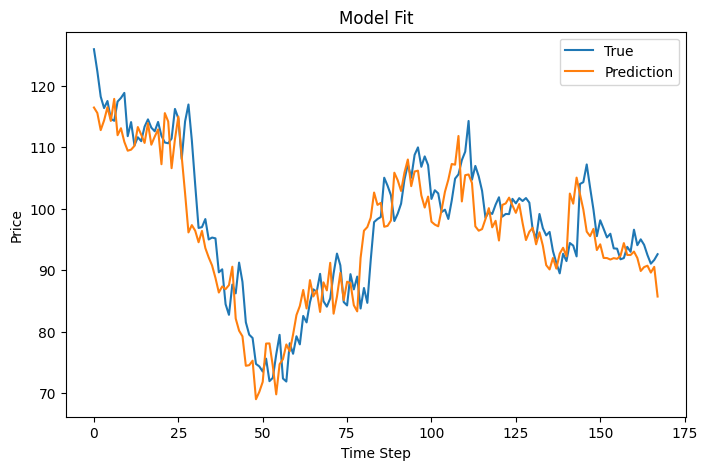

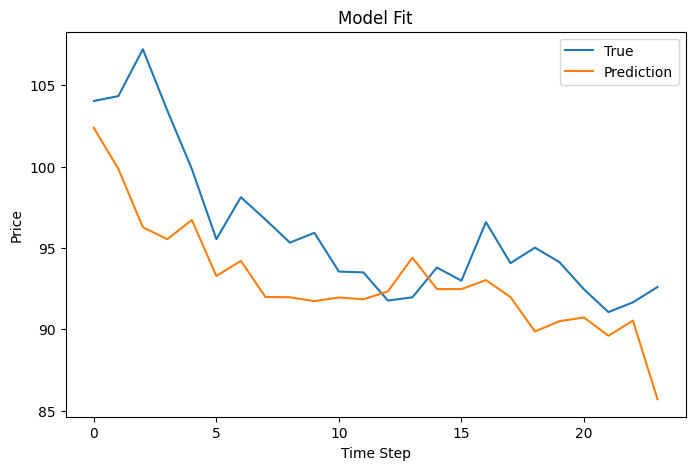

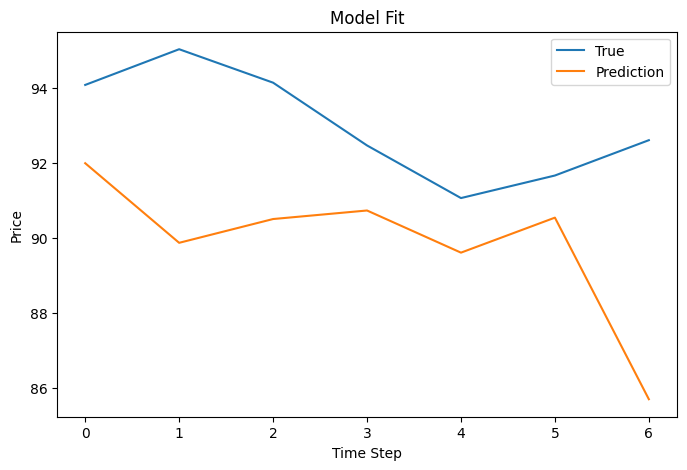

In [12]:
#Move the Close prices into their own array
price = df['Close']
#Reshape into a 2d array
price = price.values.reshape(-1, 1)
# Calculate the number of data points to consider (75% of the total data points)
num_points = int(len(price) * 0.75)
# Initialize the Scaler
scaler = StandardScaler()
# Fit the scaler to the first 75% of the data and store it in an array
scaler.fit(price[:num_points])
price = scaler.transform(price)
#Reshape the data into a dataframe so that we can achieve a sequence length of 3
df2 = pd.DataFrame(price.reshape(1875, 4), columns=['First', 'Second', 'Third', 'Target'])
# Shift the input values to create a lead effect (choose how many days the model should lead the target by)
lead_steps = 3  ### Adjust the number of time steps to lead by
df2[['First', 'Second', 'Third']] = df2[['First', 'Second', 'Third']].shift(-lead_steps)
# Drop rows with NaN values due to shifting
df2.dropna(inplace=True)
x_train = df2.iloc[:1406, :-1]
y_train = df2.iloc[:1406, -1]
x_test = df2.iloc[1407:1871, :-1]
y_test = df2.iloc[1407:1871, -1]
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# Reshape input data to include the timesteps dimension
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
# Build the transformer multi-head atention model
model = Sequential()
model.add(SeqSelfAttention(attention_activation='sigmoid', input_shape=(1, 3)))
model.add(Reshape((3,)))  # Reshape to remove the added dimension by attention layer 
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')  
model.summary()
# Define callbacks for learning rate reduction and early stopping to prevent overfitting
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.4, patience=10, min_lr=0.001)
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(x_train, y_train, batch_size=10, epochs=300, verbose=2, callbacks=[reduce_lr, early_stopping])
# Output model predictions
y_pred = model.predict(x_test)
# Plot results
plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()
# Inverse transform for plotting
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)
#Plot inverse transformed values
plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(y_test_inv, label='True')
plt.plot(y_pred_inv, label='Prediction')
plt.legend()
#Plot the last 168 data points
plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(y_test_inv[-168:], label='True')
plt.plot(y_pred_inv[-168:], label='Prediction')
plt.legend()
#Plot the last 24 data points
plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(y_test_inv[-24:], label='True')
plt.plot(y_pred_inv[-24:], label='Prediction')
plt.legend()
#Plot the last week
plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(y_test_inv[-7:], label='True')
plt.plot(y_pred_inv[-7:], label='Prediction')
plt.legend()
# Calculate evaluation metrics
mae_tf = mean_absolute_error(y_test_inv, y_pred_inv)
mse_tf = mean_squared_error(y_test_inv, y_pred_inv)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test_inv, y_pred_inv)
mape_tf = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
print("Evaluation metrics:")
print(f"Mean Absolute Error (MAE): {mae_tf:.4f}")
print(f"Mean Squared Error (MSE): {mse_tf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tf:.4f}")
print(f"R-squared (R2) Score: {r2_tf:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tf:.4f}%")

In [13]:
# Save the model
model.save("3daytransformer_model.h5")
from keras.models import load_model
# Load the model
loaded_model = load_model("3daytransformer_model.h5", custom_objects={'SeqSelfAttention': SeqSelfAttention})
df = main().dropna(axis=0)
#Begin replication of pre-proessing steps to prepare input data shape that is expected by the model we built above
price = df['Close']
price = price.values.reshape(-1, 1)
# Calculate the number of data points to consider (75% of the total data points)
num_points = int(len(price) * 0.75)
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the first 75% of the data
scaler.fit(price[:num_points])
price = scaler.transform(price)
#Create sequence length shape
df2 = pd.DataFrame(price.reshape(1875, 4), columns=['First', 'Second', 'Third', 'Target'])
# Shift the input values
lead_steps = 3  # Adjust the number of time steps to lead by
df2[['First', 'Second', 'Third']] = df2[['First', 'Second', 'Third']].shift(-lead_steps)
# Drop rows with NaN values due to shifting
df2.dropna(inplace=True)
x_test_new = df2.iloc[-4:, :-1]  # Taking the last 4 data points for prediction as we left them out of the testing set in the code above to ensure the model hasnt seen them
x_test_new = np.array(x_test_new)
x_test_new = x_test_new.reshape(x_test_new.shape[0], 1, x_test_new.shape[1])
# Make prediction using the loaded model
predicted_price = loaded_model.predict(x_test_new)
# Inverse transform the predicted value to get the actual price
predicted_price_inv = scaler.inverse_transform(predicted_price)
#Last price listed is our futuristic forecast for the next 3 days.
print("Predicted future price:", predicted_price_inv)

C:\Users\daddy\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
C:\Users\daddy\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 95ms/step
Predicted future price: [[89.60802 ]
 [90.539276]
 [85.70845 ]
 [84.873764]]
